# TP Chaînes de Markov

## 1- Génération d'une variable aléatoire discrète

### Exemple : 
On se place sur un espace fini
$$
E= \{ Rouge, Bleu, Vert\}
$$

On souhaite simuler une variable aléatoire de loi :
$$
\begin{array}{c|ccc}
X & Rouge & Bleu & Vert \\
\hline
\mathbb{P}(X=k) & \frac{1}{2} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

Pour cela, on se sert de la fonction Python
$$ np.random.uniform(0,1) $$
qui simule une loi uniforme sur [0,1]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Simulation d'une réalisation de la variable aléatoire X 
x=np.random.uniform(0,1)
if x <= 1/2 :
    print("Rouge");
elif x<= 5/6 :
    print("Bleu");
else: print("Vert");
    


Bleu


Expliquer pourquoi l'exemple précédent fonctionne.

### Exercice 1
Soit $m\in\mathbb{N}$. On se place sur l'ensemble 
$$
E_m= \{0, 1, ..., m\}
$$
1. Écrire une fonction "Simu" qui prend en entrée un vecteur de probabilité $$\mu=(p_0~~\ldots ~~ p_m)$$ et qui simule une observation d'une variable aléatoire $X$ telle que $\mathbb{P}(X=k)=p_k$ pour tout $k\in E_m$.

2. Vérifier son bon fonctionnement pour le vecteur $$\mu=(1/4,1/3,1/12,1/6,1/6).$$

In [4]:
# Définition de la fonction Simu
def Simu(mu):
    return np.random.choice(len(mu), p=mu)

In [5]:
# Test de la fonction Simu
mu=(1/4,1/3,1/12,1/6,1/6)
for i in range(10):
    print(Simu(mu))

1
1
4
3
0
3
1
4
0
1


## 2- Application à la simulation d'une chaîne de Markov

### Exemple :

On considère la chaîne de Markov sur $E_2=\{0,1,2\}$ de matrice de transition
$$P= \begin{pmatrix} 0 & 0.1 & 0.9 \\ 0.1 & 0 & 0.9 \\ 0.5 & 0.5 & 0 \end{pmatrix}$$

On rappelle que si $\mu_n$ désigne la loi de $X_n$, c'est à dire:
$$
\mu_n= 
\begin{pmatrix}\mathbb{P}(X_n=0)& \mathbb{P}(X_n=1)& \mathbb{P}(X_n=2)
\end{pmatrix}
$$


Alors, on a la relation:
$$
\mu_{n+1} = \mu_{n}P
$$

Prenons $X_0$ de loi 
$$
\mu_0 = \begin{pmatrix}
\frac{1}{2}& \frac{1}{3}& \frac{1}{6}
\end{pmatrix}
$$

On donne le code suivant.

In [6]:
# Simulation de n pas dans la chaîne de Markov:
n=100
Mkv=[]

# Simulation de X_0:
mu_0=(1/2,1/3,1/6)
Mkv.append(Simu(mu_0))

# Matrice de transition:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
    

for i in range(n):
    State = Mkv[-1] # On sélectionne la ligne de P correspondant à l'état dans lequel est la chaîne
    mu_i= P[State] 
    Mkv.append(Simu(mu_i))# On simule une réalisation de loi la ligne correspondante.


print(Mkv)


[0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2]


S'approprier le code ci dessus. On pourra par exemple :
- faire varier le nombre de pas dans la chaîne de Markov ;
- changer la matrice de transition et/ou la probabilité initiale.

### Exercice 2 : 
On souhaite simuler une chaîne de Markov sur $E_m=\{0,\ldots,m\}$. 
Écrire une fonction "Markov" qui prend en paramètres :
- une loi initiale, 
- une matrice de transition,
- un nombre $n$ de pas à simuler 

et qui retourne un vecteur contenant les $n+1$  états parcourus par la chaîne de Markov.

Vérifier le bon fonctionnement du code à l'aide de l'exemple précédent.

In [7]:
# Fonction Markov:
def Markov(mu_0, P, n):
    Mkv = []
    Mkv.append(Simu(mu_0))

    for i in range(n):
        State = Mkv[-1]
        mu_i = P[State]
        Mkv.append(Simu(mu_i))
    
    return Mkv

Mkv = Markov(mu_0, P, n)

### Représentation et visualisation

Revenons à notre exemple. On peut chercher à représenter la trajectoire en fonction du nombre de pas :

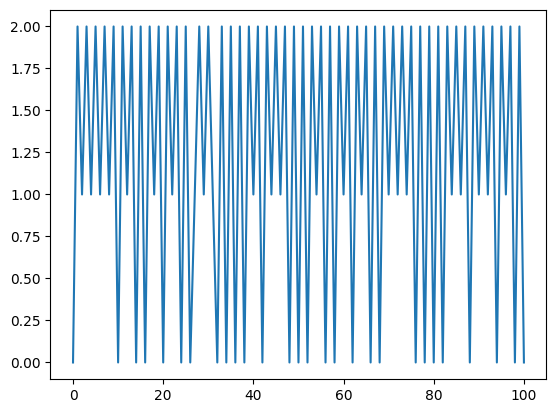

In [8]:
#Représentation de la chaîne de Markov donné en exemple :
Niter=range(n+1)
plt.plot(Niter,Mkv)

On voit qu'en temps long, ce genre de graphique n'est pas très utile. 
À la place, on dessine un histogramme :

(array([28., 24., 49.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <BarContainer object of 3 artists>)

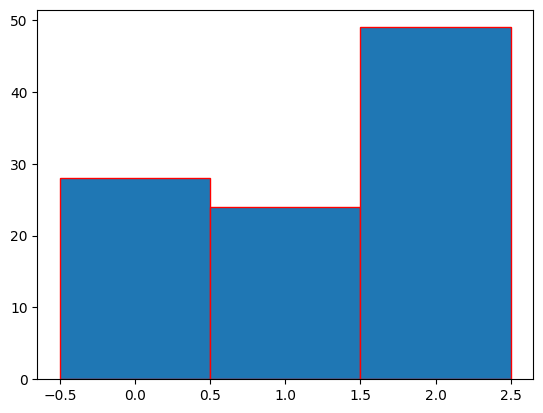

In [9]:
plt.hist(Mkv, range = (-0.5, 2.5), density=False, bins = 3,edgecolor = 'red')

### Exercice 3 :

1. Se servir du code écrit à l'exercice 2 pour simuler $n$ pas d'une chaîne de Markov $(X_n)_{n \in \mathbb{N}}$ et représenter l'histogramme obtenu pour différentes valeurs de $n$. 
<br>
On prendra différentes matrices de transitions et lois initiales donnant :
- une chaîne irréductible, récurrente et apériodique,
- une chaîne avec plusieurs états transitoires et une seule classe récurrente,
- une chaîne avec plusieurs classes récurrentes.
<br>
<br>
Pour chaque exemple, illustrer en faisant plusieurs simulations avec différents choix de loi initiale, le comportement de la chaîne de Markov et commenter les résultats obtenus.

#### Une simulation de chaîne irréductible, récurrente et apériodique :

(array([ 682., 2230.,  981., 3547., 2561.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

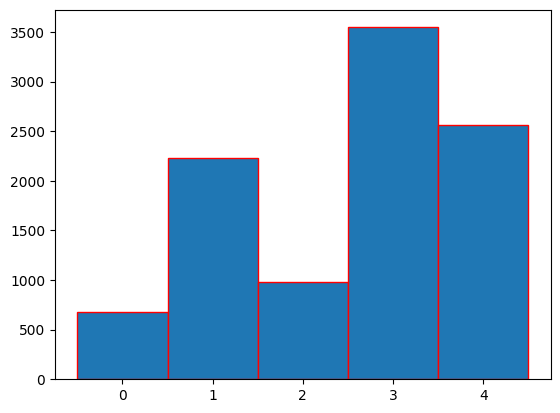

In [10]:
n_0 = 10000
mu_00 = (0.2, 0.2, 0.2, 0.2, 0.2)
P_0 = np.array([[0.0, 0.3, 0.0, 0.7, 0.0],
              [0.0, 0.0, 0.3, 0.7, 0.0],
              [0.0, 0.3, 0.3, 0.0, 0.4],
              [0.2, 0.0, 0.0, 0.4, 0.4],
              [0.0, 0.7, 0.0, 0.0, 0.3]])

plt.hist(Markov(mu_00, P_0, n_0), range = (-0.5, len(mu_00) - 0.5), density=False, bins = len(mu_00), edgecolor = 'red')

#### Commentaires :
<br>
<br>
<br>

#### Une simulation de chaîne comportant plusieurs états transitoires  et une seule classe récurrente :

(array([ 0.,  0.,  0., 28., 23.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

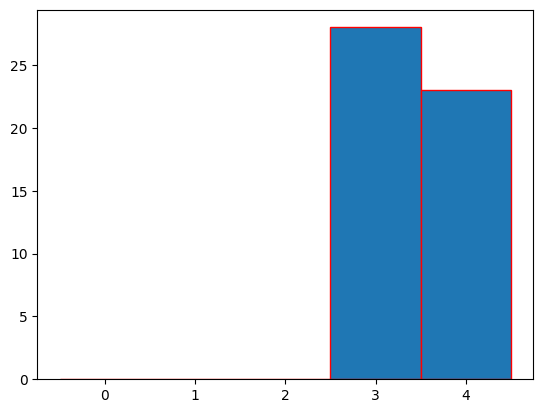

In [11]:
n_1 = 50
mu_01 = (0.2, 0.2, 0.2, 0.2, 0.2)
P_1 = np.array([
    # States 0, 1, 2 can transition between themselves, but can also "fall into" states 3 and 4.
    # From State ->   0,   1,   2,   3,   4
    [0.2, 0.3, 0.1, 0.4, 0.0],  # From State 0
    [0.1, 0.2, 0.2, 0.0, 0.5],  # From State 1
    [0.0, 0.1, 0.1, 0.8, 0.0],  # From State 2
    
    # States 3 and 4 form a "closed loop". Once you enter, you can NEVER leave.
    # From State ->   0,   1,   2,   3,   4
    [0.0, 0.0, 0.0, 0.6, 0.4],  # From State 3
    [0.0, 0.0, 0.0, 0.5, 0.5]   # From State 4
])

plt.hist(Markov(mu_01, P_1, n_1), range = (-0.5, len(mu_01) - 0.5), density=False, bins = len(mu_01), edgecolor = 'red')

#### Commentaires :
<br>
<br>
<br>

#### Une simulation de chaîne comportant plusieurs classes récurrentes :

(array([ 0.,  0.,  1., 32., 18.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

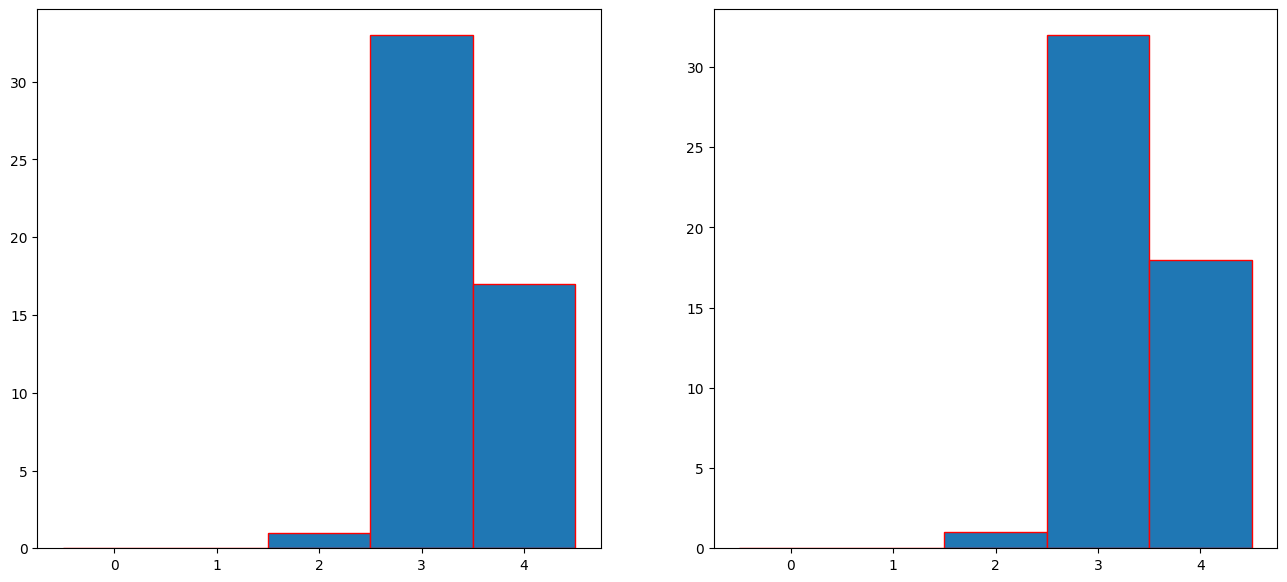

In [12]:
n_2 = 50
mu_02 = (0.0, 0.0, 1.0, 0.0, 0.0)

# Transition Matrix with two recurrent classes
# Class 1: {0, 1}
# Class 2: {3, 4}
# Transient State: {2}

P_2 = np.array([
    [0.6, 0.4, 0.0, 0.0, 0.0],  # From State 0 -> Trapped in {0, 1}
    [0.3, 0.7, 0.0, 0.0, 0.0],  # From State 1 -> Trapped in {0, 1}
    
    [0.5, 0.0, 0.0, 0.5, 0.0],  # From State 2 -> Can fall into {0,1} or {3,4}
    
    [0.0, 0.0, 0.0, 0.5, 0.5],  # From State 3 -> Trapped in {3, 4}
    [0.0, 0.0, 0.0, 0.8, 0.2]   # From State 4 -> Trapped in {3, 4}
])

fig, axs = plt.subplots(1, 2, figsize=(16, 7))

axs[0].hist(Markov(mu_02, P_2, n_2), range = (-0.5, len(mu_02) - 0.5), density=False, bins = len(mu_02), edgecolor = 'red')
axs[1].hist(Markov(mu_02, P_2, n_2), range = (-0.5, len(mu_02) - 0.5), density=False, bins = len(mu_02), edgecolor = 'red')

#### Commentaires :
<br>
<br>
<br>

### 3- Loi de $X_n$

Ecrire une fonction puissanceM qui prend en arguments une matrice $M$ et un entier naturel $n$ et renvoie la puissance $n^{\textrm{ième}}$ de la matrice $M$.

On pourra utiliser la commande np.dot pour le produit matriciel.

In [13]:
def puissanceM(M, n):
    res = np.identity(M.shape[0])
    P = M

    if n == 0 :
        return res
    
    while n > 0 :
        if n & 1 :
            res = np.dot(res, P)
        P = np.dot(P, P)
        n //= 2
    
    return res

La tester sur l'exemple ci-dessous.

In [14]:
# Exemple 
M = np.array([[0, 1, 2],
              [1, 1, 0],
              [0, -1, 1]])
# Calcul des puissances de P
puissanceM(M,14)

array([[  313.,  -313.,  1874.],
       [  937.,  1250.,  1250.],
       [ -625., -1562.,   625.]])

### Exercice 4 : 

1. Écrire un programme "LoiXn" qui prend en arguments : 
- une matrice de transition,
- un entier n,
- le vecteur qui représente la loi initiale,
<br>
et qui renvoie la loi de $X_n$ (sous forme d'un vecteur).

In [15]:
def LoiXn(P, n, mu_0):
    return np.dot(mu_0, puissanceM(P, n))

On considère à nouveau la chaîne de Markov $(X_k)_{k\in \mathbb{N}}$ sur $E_2$ de matrice de transition
$$P= \begin{pmatrix} 0 & 0.1 & 0.9 \\ 0.1 & 0 & 0.9 \\ 0.5 & 0.5 & 0 \end{pmatrix}.$$

2. Donner la loi $\mu_{n}$ de $X_n$ lorsque $\mathbb{P}(X_0=0)=1$ pour différentes valeurs de $n$.

In [16]:
# Parametres
mu_0 = (1.0, 0.0, 0.0)
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0]])

nombre_pas = 100
mu_array = []

# Fonction qui donne un tableau de Loi
def Markov_loi(P, mu_0, n):
    mu_array = []
    for i in range(n+1):
        mu_array.append(LoiXn(P, i, mu_0))
    
    return np.array(mu_array)

# La loi de Xn pour n de 1 a 99
mu_array = Markov_loi(P, mu_0, 99)

# Afficher quelques valeurs
print(f"mu_0  = {mu_array[0]}")
print(f"mu_1  = {mu_array[1]}")
print(f"mu_2  = {mu_array[2]}")
print(f"mu_10 = {mu_array[10]}")
print(f"mu_50 = {mu_array[50]}")
print(f"mu_98 = {mu_array[98]}")
print(f"mu_99 = {mu_array[99]}")

mu_0  = [1. 0. 0.]
mu_1  = [0.  0.1 0.9]
mu_2  = [0.46 0.45 0.09]
mu_10 = [0.34573963 0.34573963 0.30852074]
mu_50 = [0.26437853 0.26437853 0.47124295]
mu_98 = [0.26316566 0.26316566 0.47366868]
mu_99 = [0.2631509  0.2631509  0.47369819]


a. Que constate-t-on ? 
<br>
<br>
<br>
<br>
b. Illustrer graphiquement le résultat obtenu.

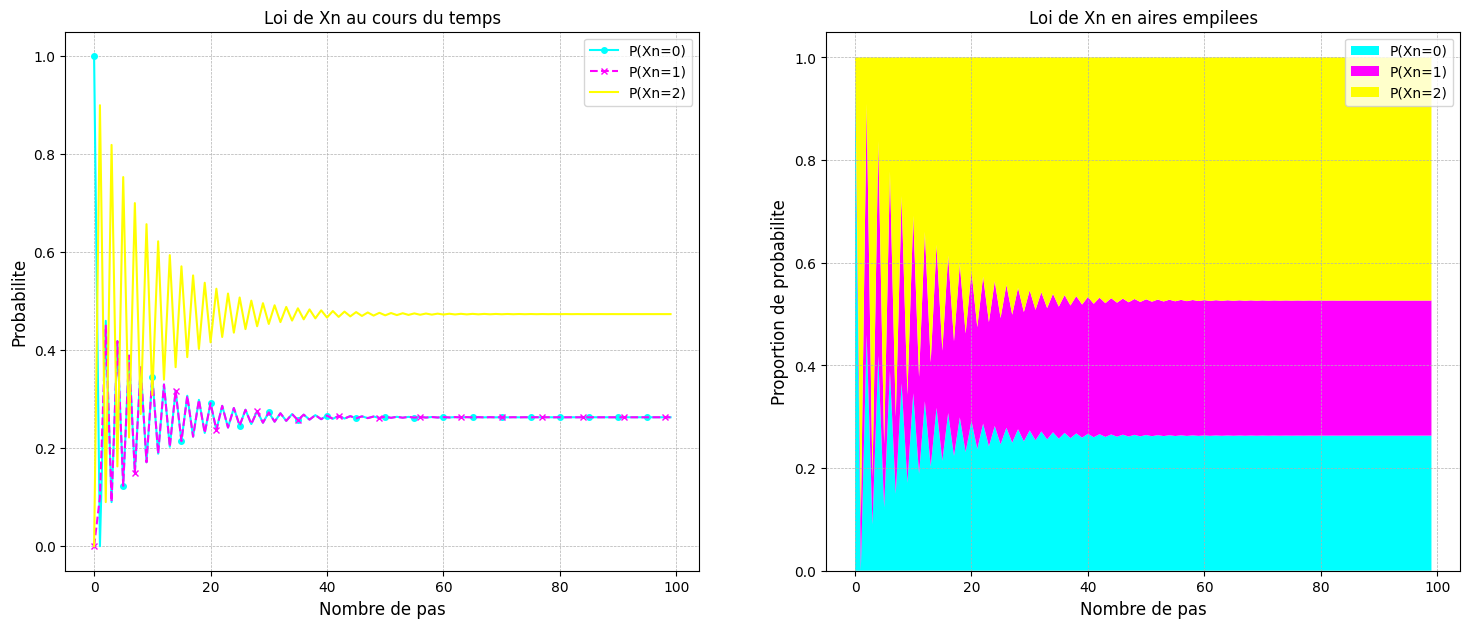

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

n_values = range(nombre_pas)

axs[0].plot(n_values, mu_array[:, 0], label='P(Xn=0)', color='cyan', ls='-', marker='o', markevery=5, markersize=4)
axs[0].plot(n_values, mu_array[:, 1], color='magenta', label='P(Xn=1)', ls='--', marker='x', markevery=7, markersize=5)
axs[0].plot(n_values, mu_array[:, 2], color='yellow', label='P(Xn=2)')

axs[0].set_title("Loi de Xn au cours du temps")
axs[0].set_xlabel("Nombre de pas", fontsize=12)
axs[0].set_ylabel("Probabilite", fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].legend()

axs[1].stackplot(n_values, mu_array[:, 0], mu_array[:, 1], mu_array[:, 2],
                 labels=['P(Xn=0)', 'P(Xn=1)', 'P(Xn=2)'],
                 colors=['cyan', 'magenta', 'yellow'])
axs[1].set_title("Loi de Xn en aires empilees")
axs[1].set_xlabel("Nombre de pas", fontsize=12)
axs[1].set_ylabel("Proportion de probabilite", fontsize=12)
axs[1].grid(True, ls='--', linewidth=0.5)
axs[1].legend()

c. Faire de même avec différents choix de loi initiale. Que remarque-t-on ?


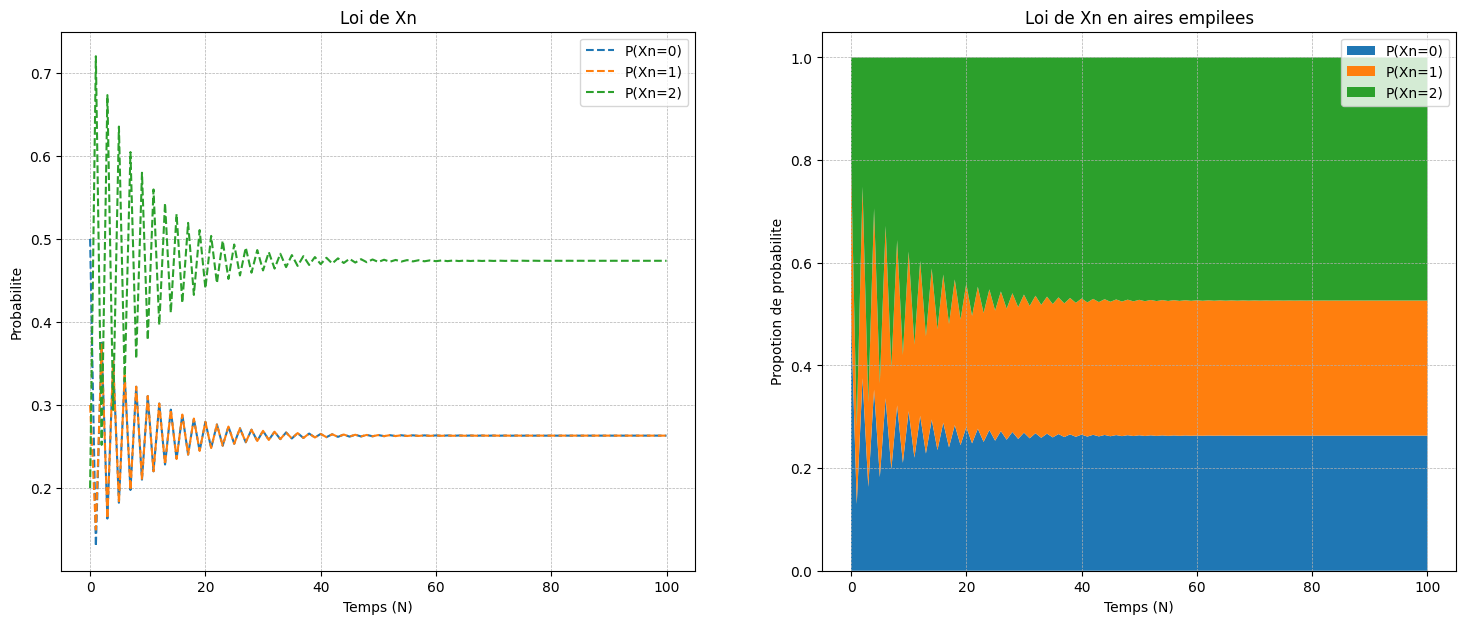

In [18]:
P = np.array([[0, 0.1, 0.9],
              [0.1, 0, 0.9],
              [0.5, 0.5, 0.0]])
mu_0 = (0.5, 0.3, 0.2)

nombre_pas = 100

def Dessiner(P, mu_0, n):
    mu_array = []
    for i in range(n+1):
        mu_array.append(LoiXn(P, i, mu_0))
    
    mu_array = np.array(mu_array)

    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    x_ax = range(n+1)

    axs[0].plot(x_ax, mu_array[:, 0], label='P(Xn=0)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 1], label='P(Xn=1)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 2], label='P(Xn=2)', ls='--')
    axs[0].set_title("Loi de Xn")
    axs[0].set_ylabel("Probabilite")
    axs[0].set_xlabel("Temps (N)")
    axs[0].grid(True, ls='--', lw=0.5)
    axs[0].legend()

    axs[1].stackplot(x_ax, mu_array[:, 0], mu_array[:, 1], mu_array[:, 2],
                     labels=['P(Xn=0)', 'P(Xn=1)', 'P(Xn=2)'])
    axs[1].set_title("Loi de Xn en aires empilees")
    axs[1].set_xlabel("Temps (N)")
    axs[1].set_ylabel("Propotion de probabilite")
    axs[1].grid(True, ls='--', lw=0.5)
    axs[1].legend()

Dessiner(P, mu_0, nombre_pas)

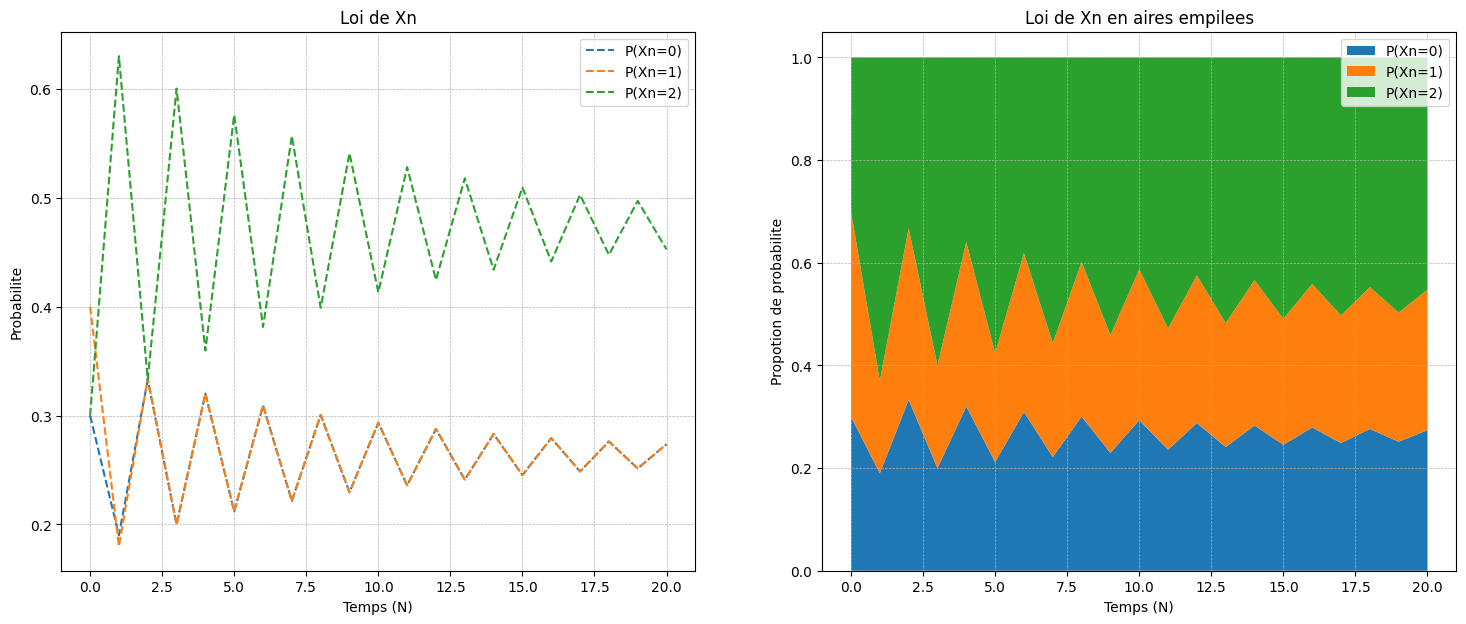

In [19]:
mu_0 = (0.3, 0.4, 0.3)
Dessiner(P, mu_0, 20)

d. Considérons $\mu_{100}$. Calculer $\mu_{100}P$.

In [20]:
print(LoiXn(P, 101, mu_0))

[0.26315582 0.26315582 0.47368836]


- Que constate-t-on ? 
<br>
<br>
- Quel résultat cela illustre-il ? 
<br>
<br>
<br>
<br>

3. On considère maintenant la chaîne $(Z_n)_{n\in \mathbb{N}} $ sur $\{0,1,2,3\}$ de matrice de transition :
    $$P_a= \begin{pmatrix} 
                        0  & 0.4 & 0   & 0.6 \\ 
                        0.3 & 0   & 0.7 & 0   \\ 
                         0  & 0.6 & 0   & 0.4  \\
                        0.2 & 0   & 0.8 & 0     \\
        \end{pmatrix}$$

In [21]:
Pa = np.array([[0, 0.4, 0,0.6],
              [0.3, 0, 0.7,0],
              [0, 0.6, 0.0,0.4],
              [0.2, 0,0.8,0]])

a. Calculer la loi de $Z_n$ pour $n$ grand et pair avec pour loi initiale 
$$\mu_0=(1~~0~~0~~0).$$

b. Faire de même avec $n$ grand et impair. 

In [22]:
print(LoiXn(Pa, 202, (1,0,0,0)))

[0.25490196 0.         0.74509804 0.        ]


c. Que constate-t-on ? À quoi cela est-il dû ?  

4. On considère maintenant le vecteur $$\mu=(0,1275~~0,2745~~0,3725~~0,2250)$$ et le produit $\mu P_a$ : 

In [23]:
mu=np.array([0.1275,0.2745,0.3725,0.2255])
print("mu=",mu)
muPa=np.dot(mu,Pa)
print("muPa=",muPa)

mu= [0.1275 0.2745 0.3725 0.2255]
muPa= [0.12745 0.2745  0.37255 0.2255 ]


a. Que constate-t-on ?

b. Comparer le vecteur $\mu$ avec les distributions limites des sous-suites $(X_{2n})_{n\in\mathbb{N}}$ et $(X_{2n+1})_{n\in\mathbb{N}}$. Commenter.

5. Étudier la convergence en loi pour une chaîne qui comporte des états transitoires et une seule classe récurrente.

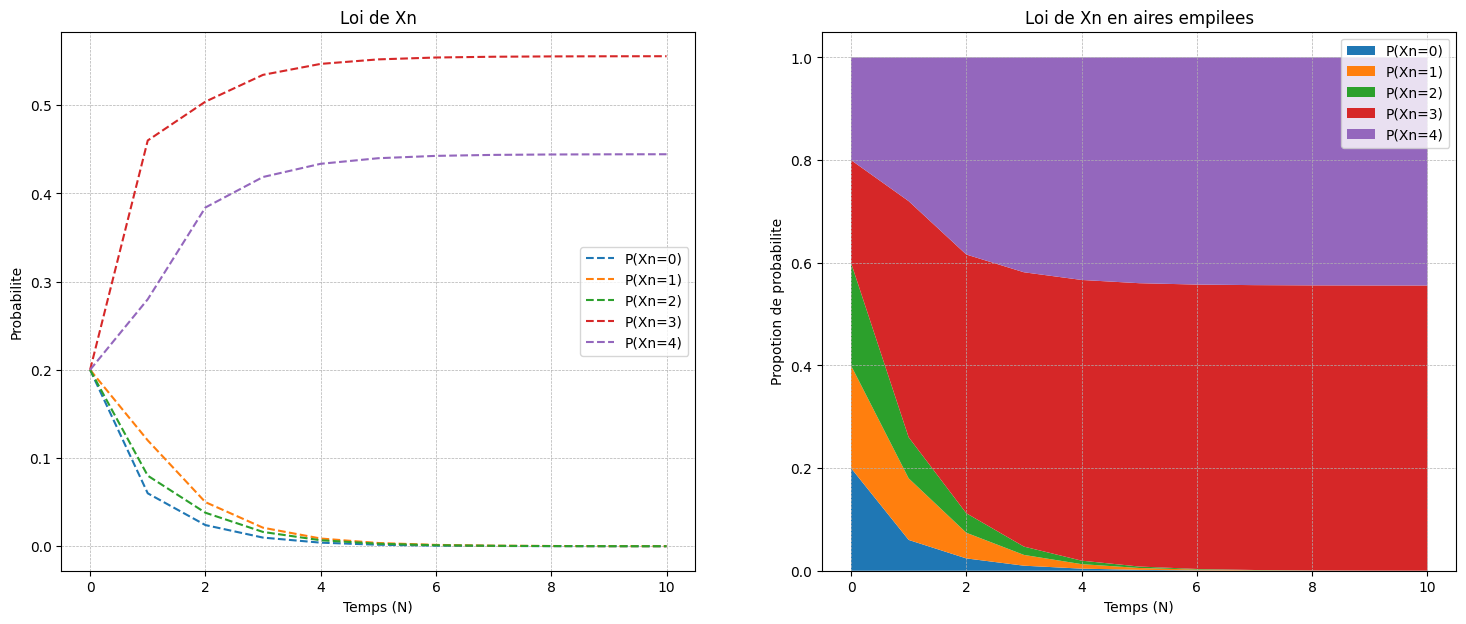

In [24]:
nombre_pas = 10
mu_01 = (0.2, 0.2, 0.2, 0.2, 0.2)
P_1 = np.array([
    # States 0, 1, 2 can transition between themselves, but can also "fall into" states 3 and 4.
    # From State ->   0,   1,   2,   3,   4
    [0.2, 0.3, 0.1, 0.4, 0.0],  # From State 0
    [0.1, 0.2, 0.2, 0.0, 0.5],  # From State 1
    [0.0, 0.1, 0.1, 0.8, 0.0],  # From State 2
    
    # States 3 and 4 form a "closed loop". Once you enter, you can NEVER leave.
    # From State ->   0,   1,   2,   3,   4
    [0.0, 0.0, 0.0, 0.6, 0.4],  # From State 3
    [0.0, 0.0, 0.0, 0.5, 0.5]   # From State 4
])


def Dessiner2(P, mu_0, n):
    mu_array = []
    for i in range(n+1):
        mu_array.append(LoiXn(P, i, mu_0))
    
    mu_array = np.array(mu_array)

    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    x_ax = range(n+1)

    axs[0].plot(x_ax, mu_array[:, 0], label='P(Xn=0)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 1], label='P(Xn=1)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 2], label='P(Xn=2)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 3], label='P(Xn=3)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 4], label='P(Xn=4)', ls='--')
    axs[0].set_title("Loi de Xn")
    axs[0].set_ylabel("Probabilite")
    axs[0].set_xlabel("Temps (N)")
    axs[0].grid(True, ls='--', lw=0.5)
    axs[0].legend()

    axs[1].stackplot(x_ax, mu_array[:, 0], mu_array[:, 1], mu_array[:, 2], mu_array[:, 3], mu_array[:, 4],
                     labels=['P(Xn=0)', 'P(Xn=1)', 'P(Xn=2)', 'P(Xn=3)', 'P(Xn=4)'])
    axs[1].set_title("Loi de Xn en aires empilees")
    axs[1].set_xlabel("Temps (N)")
    axs[1].set_ylabel("Propotion de probabilite")
    axs[1].grid(True, ls='--', lw=0.5)
    axs[1].legend()

Dessiner2(P_1, mu_01, nombre_pas)

#### Remarque :
Pour éviter des calculs de puissance d'une grosse matrice, on pourrait laisser évoluer la chaîne de Markov pendant un certain temps et *compter* la proportion du temps passé dans chaque état.

## 4- Application

France TV a lancé fin 2020 sa plate-forme de streaming, "Salto".
Elle devait se faire une place entre Netflix et Disney+, les plus gros intervenants du secteur.

On suppose que la distribution des parts de marché est comme suit:

$$
\begin{array}{c|cccc}
Service & Netflix & Disney+ & Salto & SansAbonnement \\
\hline
Part \  de \  marché & .55 & .2 & .1 & .15
\end{array}
$$

Disney+ s'inquiète alors de l'évolution du marché si rien n'est fait et contacte une agence de publicité. L'agence leur indique qu'avec la campagne qu'elle leur propose, les abonnées des différentes plateforme passeront, chaque semaine, d'une plateforme à l'autre selon ce qu'indique la matrice suivante : 

$$
\begin{array}{c|cccc}
 & Netflix & Disney+ & Salto & SansAbonnement \\
 \hline 
Netflix& 0.9262 & 0.0385 & 0.01&  0.0253 \\
Disney+&0.01& 0.94& 0.01& 0.04\\
Salto&0.01& 0.03& 0.92& 0.04\\
SansAbonnement&0.035& 0.035& 0.035& 0.895              
\end{array}
$$
C'est à dire qu'un usager de Netflix a une probabilité 92.62 \% de rester sur Netflix pour la semaine, 3,85\% de de passer chez Disney+, 1\% de passer chez Salto, etc.


### Exercice 6 :

- Simuler le comportement de $N$ abonnées après trois semaines de campagne, puis après vint semaines.
- Calculer la loi de $X_n$ pour $n$ grand.
- Interpréter les résultats obtenus.

In [25]:
S = np.array([[0.9262, 0.0385, 0.01, 0.0253],
              [0.01, 0.94, 0.01, 0.04],
              [0.01, 0.03, 0.92, 0.04],
             [0.035, 0.035, 0.035, 0.895]])

mu_S=np.array([0.55, 0.2, 0.1, 0.15])

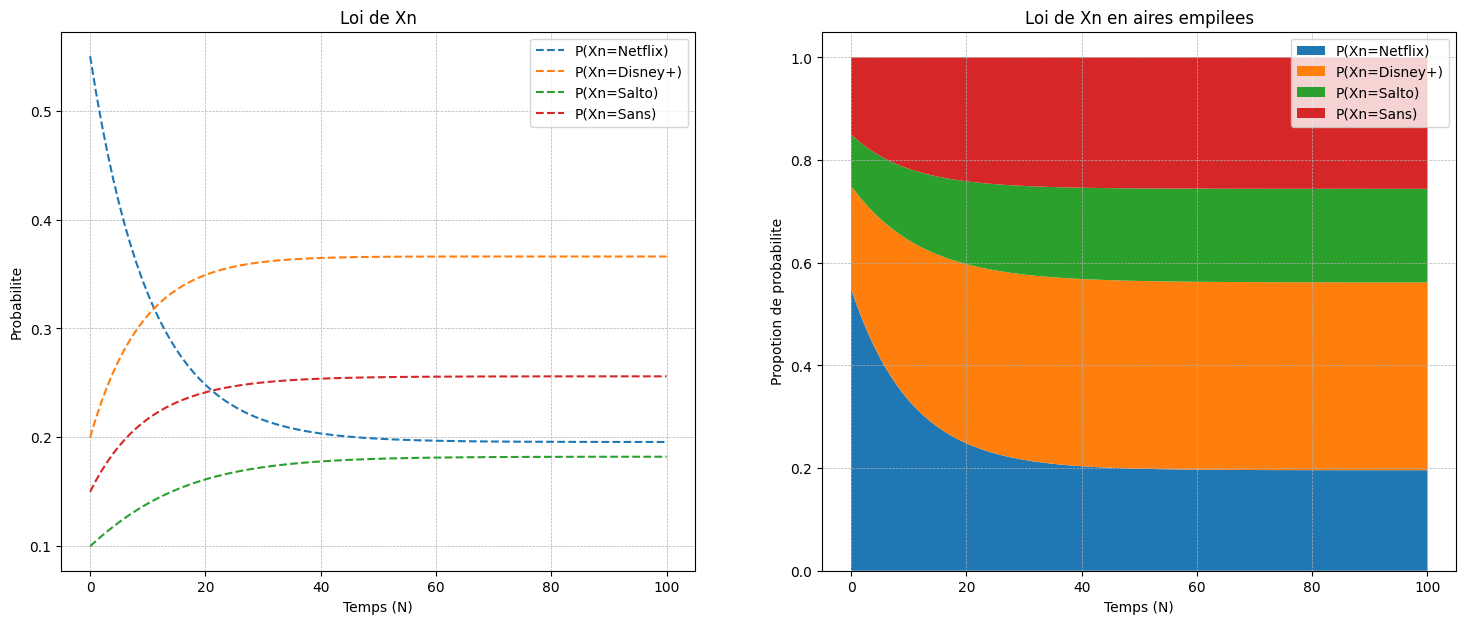

In [26]:
def Dessiner3(P, mu_0, n):
    mu_array = []
    for i in range(n+1):
        mu_array.append(LoiXn(P, i, mu_0))
    
    mu_array = np.array(mu_array)

    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    x_ax = range(n+1)

    axs[0].plot(x_ax, mu_array[:, 0], label='P(Xn=Netflix)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 1], label='P(Xn=Disney+)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 2], label='P(Xn=Salto)', ls='--')
    axs[0].plot(x_ax, mu_array[:, 3], label='P(Xn=Sans)', ls='--')
    axs[0].set_title("Loi de Xn")
    axs[0].set_ylabel("Probabilite")
    axs[0].set_xlabel("Temps (N)")
    axs[0].grid(True, ls='--', lw=0.5)
    axs[0].legend()

    axs[1].stackplot(x_ax, mu_array[:, 0], mu_array[:, 1], mu_array[:, 2], mu_array[:, 3],
                     labels=['P(Xn=Netflix)', 'P(Xn=Disney+)', 'P(Xn=Salto)', 'P(Xn=Sans)'])
    axs[1].set_title("Loi de Xn en aires empilees")
    axs[1].set_xlabel("Temps (N)")
    axs[1].set_ylabel("Propotion de probabilite")
    axs[1].grid(True, ls='--', lw=0.5)
    axs[1].legend()

Dessiner3(S, mu_S, 100)

## 5- Cas d'une chaîne de Markov sur un espace infini

Dans cette dernère partie, on s'intéresse à une chaîne de Markov sur un espace d'états infini. 

### Exercice  7 : 
- Simuler la marche aléatoire (partant de 0) sur $\mathbb{N}$ à l'aide d'une suite de variables aléatoires de Rademacher:
$$
\mathbb{P}(X_n= 1)=p = 1-\mathbb{P}(X_n= -1).
$$

- Comparer les comportements de la chaîne pour $p<1/2$, pour  $p>1/2$ et pour $p=1/2$.
- Représenter graphiquement ces 3 cas.

In [27]:
def SimuRademacher(p):
    pi = (1-p, p)
    return np.random.choice([1, -1], p=pi)

print(SimuRademacher(1/2))

1


In [28]:
def marcheAleatoire(p, n):
    pi_arr = [0]
    for _ in range(n):
        pi_arr.append(pi_arr[-1] + SimuRademacher(p))
    
    return np.array(pi_arr)

print(marcheAleatoire(1/2, 10))

[ 0 -1  0 -1  0 -1 -2 -3 -2 -1 -2]


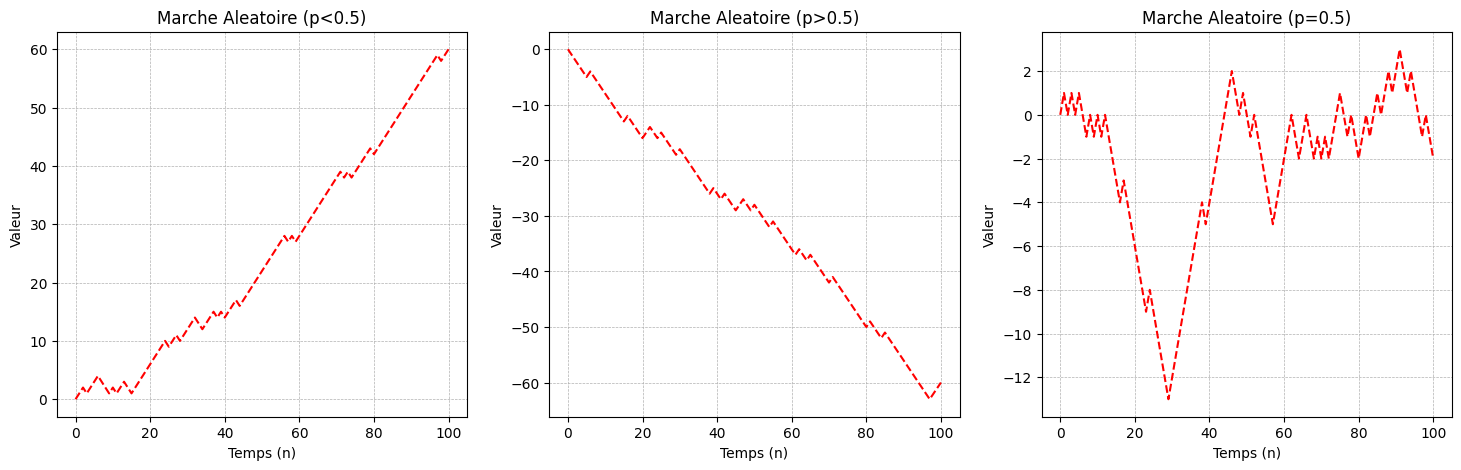

In [29]:
def plotMarcheAleatoire(p, n):
    pi_arr = []
    for i in range(3):
        pi_arr.append(marcheAleatoire(p[i], n))

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    title = ["Marche Aleatoire (p<0.5)", "Marche Aleatoire (p>0.5)", "Marche Aleatoire (p=0.5)"]
    x_ax = range(n+1)

    for i in range(3):
        axs[i].plot(x_ax, pi_arr[i], color='red', ls='--')
        axs[i].set_title(title[i])
        axs[i].set_xlabel("Temps (n)")
        axs[i].set_ylabel("Valeur")
        axs[i].grid(True, ls='--', lw=0.5)
    
    plt.show()

plotMarcheAleatoire([1/4, 3/4, 1/2], 100)

### Modèle de Stock 

On considère l'exemple de l'exercice 5 de la feuille de TD 2. 
On pourra utiliser sans preuve les résultats de cet exercice.

On note $X_n$ l'état d'un stock de pièces détachées à l'instant $n$, $D_{n+1}$ la demande (aléatoire) formulée par des clients, et on suppose qu'une seule pièce détachée est fabriquée entre les instants $n$ et $n+1$.

L'état du stock à l'instant $n+1$ est alors
$$X_{n+1} = \max(X_n + 1 - D_{n+1},0).$$


On suppose que $X_0 = 0$ (le stock est initialement vide) et que $(D_n)_{n \geq 1}$ est une suite de v.a. indépendantes et de même loi que $D$, une v.a. à valeurs dans $\{0,1,2\}$:

$$
\begin{array}{c|ccc}
D & 0 & 1 & 2 \\
\hline
\mathbb{P}(D=k) & p_0 & p_1 & p_2
\end{array}
$$

On suppose que les trois probabilités $p_0,p_1,p_2$ sont strictement positives, et $p_2 \ge p_1$.


### Exercice 9 :

- Simuler cette chaine de Markov (partant de 0)  pour différentes valeurs de $p_0,p_1,p_2$.


In [30]:
def SimuD(p):
    return np.random.choice(range(3), p=p)

print(SimuD((0.2, 0.3, 0.5)))

2


In [31]:
def SimuStock(p, n):
    Mkv = [0]

    for _ in range(n):
        Mkv.append(max(Mkv[-1] + 1 - SimuD(p), 0))
    
    return np.array(Mkv)

print(SimuStock((0.2, 0.3, 0.5), 100))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2
 2 1 1 1 1 1 1 1 2 1 1 0 1 0 0 1 2 2 1 0 0 1 2 1 0 0 0]


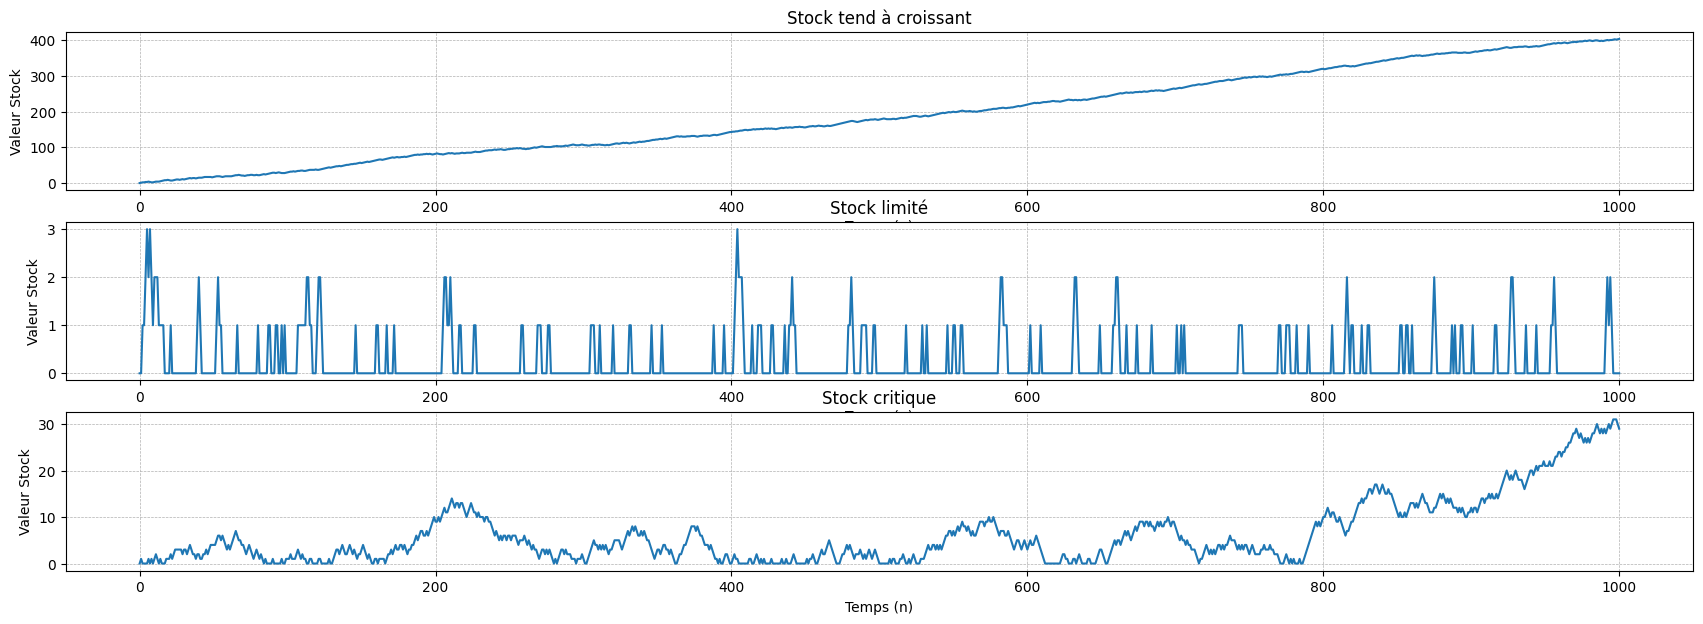

[array([  0,   1,   2, ..., 402, 403, 404], shape=(1001,)),
 array([0, 0, 1, ..., 0, 0, 0], shape=(1001,)),
 array([ 0,  1,  0, ..., 31, 30, 29], shape=(1001,))]

In [36]:
def plotStock(p_arr, n, title):
    Mkv = []
    for i in range(len(p_arr)):
        Mkv.append(SimuStock(p_arr[i], n))

    fig, axs = plt.subplots(len(p_arr), 1, figsize=(21, 7))
    axs = np.atleast_1d(axs)

    x_ax = range(n+1)
    for i in range(len(p_arr)):
        axs[i].plot(x_ax, Mkv[i], ls='-')
        axs[i].set_title(title[i])
        axs[i].set_xlabel("Temps (n)")
        axs[i].set_ylabel("Valeur Stock")
        axs[i].grid(True, ls='--', lw=0.5)
    
    plt.show()

    return Mkv

plotStock([(0.6, 0.2, 0.2), (0.1, 0.3, 0.6), (0.4, 0.2, 0.4)], 1000,
          ["Stock tend à croissant", "Stock limité", "Stock critique"])

- Étudier le cas $p_0=p_2$. 
- En question 5 de l'exercice 5, on montre que si $p_0 < p_2$,
$$
\mu(k) = \left(\frac{p_0}{p_2}\right)^k
$$
est une mesure invariante pour la chaine. 


- Comparer le vecteur des fréquences empiriques avec la probablité invariante.

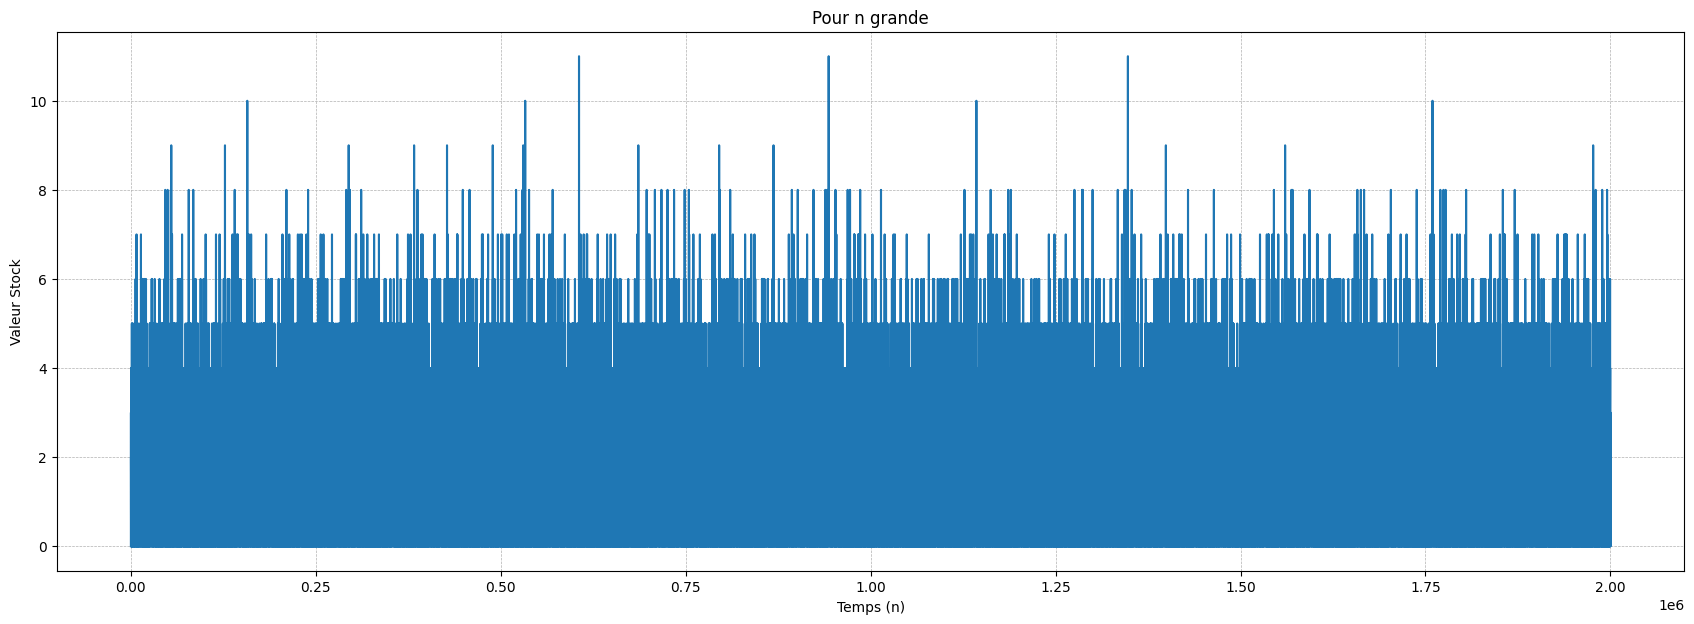

In [52]:
p = (0.2, 0.2, 0.6)

stock_simu = plotStock([p], 2_000_000,
                       ["Pour n grande"])


 Max stock level observed: 11

--- Comparison: Empirical vs. Theoretical ---
State (k) | Empirical Freq. | Theoretical Prob.
-----------------------------------------------
    0     |     0.667742      |      0.666667     
    1     |     0.221681      |      0.222222     
    2     |     0.073671      |      0.074074     
    3     |     0.024579      |      0.024691     
    4     |     0.008221      |      0.008230     
    5     |     0.002723      |      0.002743     
    6     |     0.000901      |      0.000914     
    7     |     0.000324      |      0.000305     
    8     |     0.000115      |      0.000102     
    9     |     0.000030      |      0.000034     
    10    |     0.000011      |      0.000011     
    11    |     0.000002      |      0.000004     


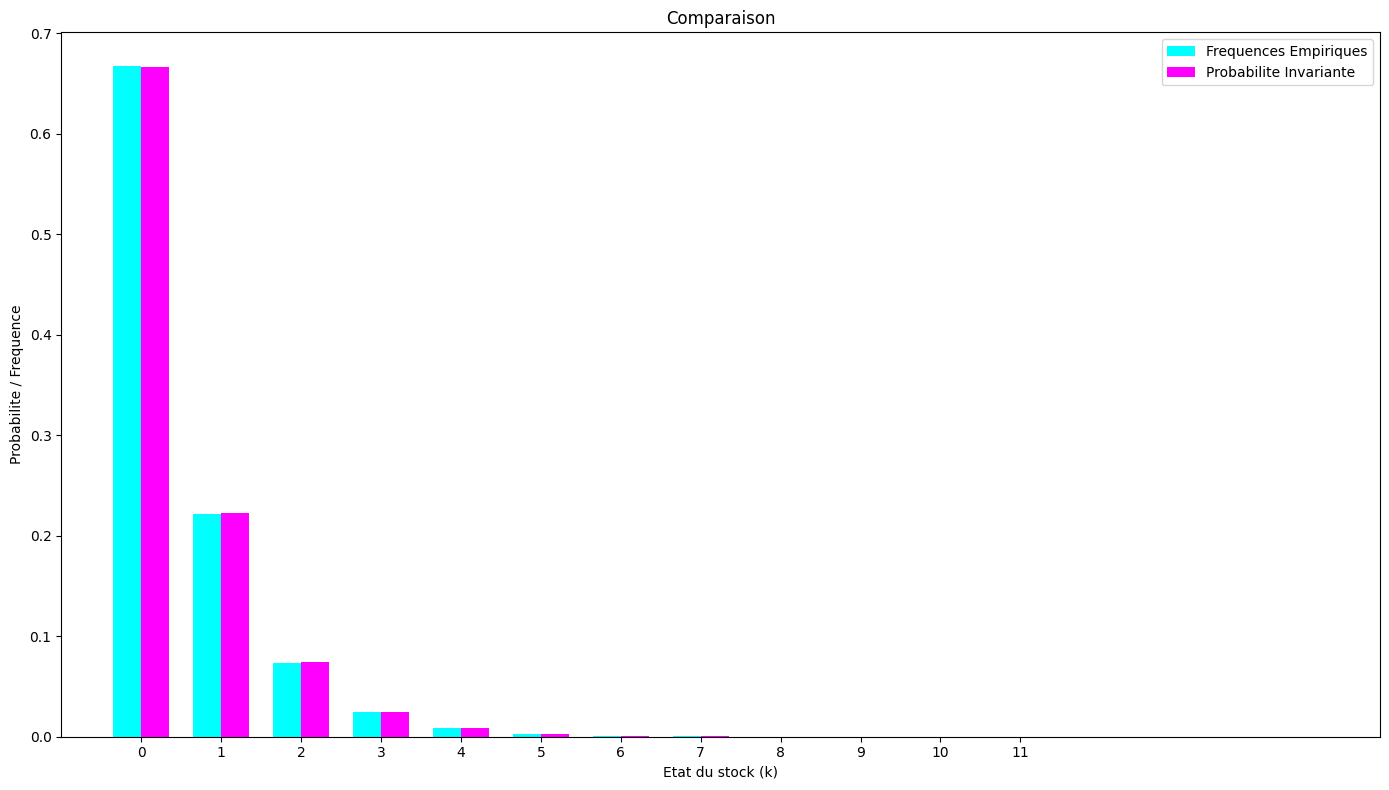

In [53]:
burn_in = 5000
stock_stationaire = stock_simu[0][burn_in:]

counts = np.bincount(stock_stationaire)
empirique_freq = counts / len(stock_stationaire)
max_etat_observe = len(empirique_freq)

print(f"\n Max stock level observed: {max_etat_observe - 1}")

rho = p[0]/p[2]
z = 1 / (1 - rho)

k = np.arange(max_etat_observe)
prob = (rho**k) / z


print("\n--- Comparison: Empirical vs. Theoretical ---")
print("State (k) | Empirical Freq. | Theoretical Prob.")
print("-----------------------------------------------")
for i in range(min(max_etat_observe, 15)):
    print(f" {i:^8} | {empirique_freq[i]:^17.6f} | {prob[i]:^18.6f}")


fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(max_etat_observe)
width = 0.35

rects1 = ax.bar(x - width/2, empirique_freq, width, label='Frequences Empiriques', color='cyan')
rects2 = ax.bar(x + width/2, prob, width, label='Probabilite Invariante', color='magenta')

ax.set_title("Comparaison")
ax.set_xlabel("Etat du stock (k)")
ax.set_ylabel("Probabilite / Frequence")
ax.set_xticks(x)
ax.set_xlim(-1, 15.5)

ax.legend()

fig.tight_layout()
plt.show()

On définit la variable aléatoire: 

$$
T= \inf\{n \geqslant 1 \vert X_n=0 \}.
$$

- Que représente $T$?

- Simuler une réalisation de T et afficher l'évolution de la chaîne au cours du temps.

Simulation d'une réalisation de T:
Le stock est retourné à 0 pour la première fois au temps T = 2


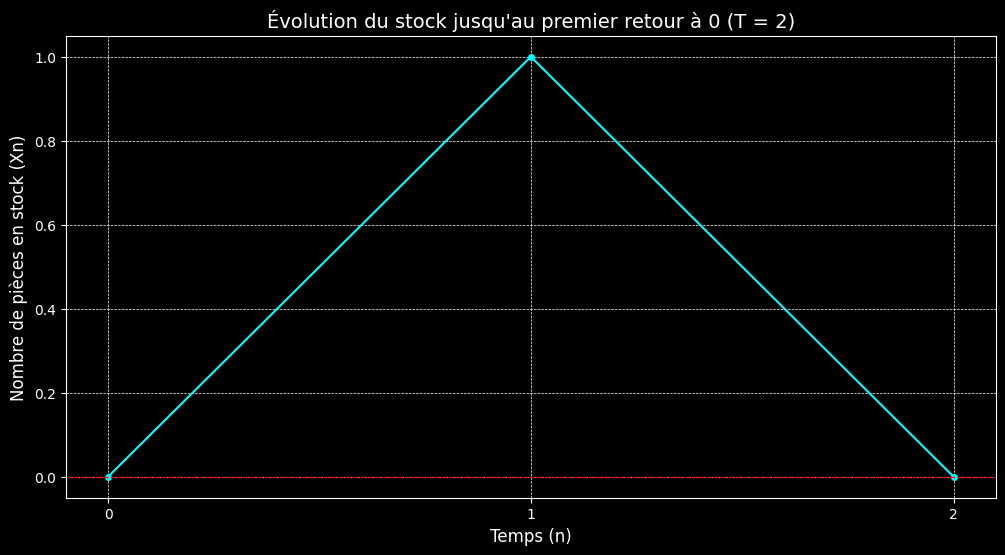

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_temps_retour_zero(prob_demande, x0=0):
    """
    Simule une trajectoire de la chaîne jusqu'au premier retour à l'état 0.
    
    Args:
        prob_demande (list): Une liste des probabilités [p0, p1, p2].
        x0 (int): L'état initial du stock.

    Returns:
        tuple: (T, stock_history)
               T (int): Le temps du premier retour à 0 (n >= 1).
               stock_history (list): L'historique des états jusqu'au temps T.
    """
    stock_history = [x0]
    current_stock = x0
    demande_values = [0, 1, 2]
    n = 0
    
    # We must run at least one step
    while True:
        n += 1
        demande = np.random.choice(demande_values, p=prob_demande)
        next_stock = max(current_stock + 1 - demande, 0)
        
        stock_history.append(next_stock)
        current_stock = next_stock
        
        # Stop condition: if the stock hits 0, we've found T
        if current_stock == 0:
            break
            
    return n, stock_history

# --- Simulation d'une seule trajectoire ---
# On utilise le cas récurrent où p0 < p2 pour garantir un retour à 0
p0, p1, p2 = 0.2, 0.2, 0.6
probs = [p0, p1, p2]

T_sample, history = simuler_temps_retour_zero(probs)

print(f"Simulation d'une réalisation de T:")
print(f"Le stock est retourné à 0 pour la première fois au temps T = {T_sample}")

# --- Affichage de l'évolution ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history, color='cyan', marker='o', linestyle='-', markersize=4)
ax.set_title(f"Évolution du stock jusqu'au premier retour à 0 (T = {T_sample})", fontsize=14)
ax.set_xlabel("Temps (n)", fontsize=12)
ax.set_ylabel("Nombre de pièces en stock (Xn)", fontsize=12)
ax.axhline(0, color='red', linestyle='--', linewidth=1) # Ligne de l'état 0
ax.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(range(T_sample + 1))
plt.show()

- Calculer numériquement $\mathbb{E}[T]$ pour $p_0<p_2$ 
- Comparer avec la valeur théorique.

In [67]:
# --- Calcul numérique de E[T] ---

# Nombre de simulations pour la méthode de Monte Carlo
num_simulations = 20000

print(f"\nCalcul de E[T] avec {num_simulations} simulations...")

# Lancer de nombreuses simulations et stocker chaque valeur de T
temps_de_retour = []
for _ in range(num_simulations):
    T, _ = simuler_temps_retour_zero(probs)
    temps_de_retour.append(T)

# L'espérance numérique est la moyenne des résultats
esperance_numerique = np.mean(temps_de_retour)

print(f"L'espérance numérique (moyenne) de T est : {esperance_numerique:.4f}")

# --- Comparaison avec la valeur théorique ---
rho = p0 / p2
esperance_theorique = 1 / (1 - rho)

print(f"La valeur théorique de E[T] est 1 / (1 - {p0}/{p2}) = {esperance_theorique:.4f}")

# --- Comparaison ---
difference = abs(esperance_numerique - esperance_theorique)
print(f"\nDifférence entre la valeur numérique et théorique : {difference:.4f}")


Calcul de E[T] avec 20000 simulations...
L'espérance numérique (moyenne) de T est : 1.5148
La valeur théorique de E[T] est 1 / (1 - 0.2/0.6) = 1.5000

Différence entre la valeur numérique et théorique : 0.0148
